# MTH3302 : Méthodes probabilistes et statistiques pour l'I.A.

Jonathan Jalbert<br/>
Professeur adjoint au Département de mathématiques et de génie industriel<br/>
Polytechnique Montréal<br/>


# TD2 - Régression linéaire

Ce TD concerne la régression linéaire (Chapitre 2 du cours). À la fin de ce TD, vous devriez être avoir été en mesure de :
- Estimer les coefficients des paramètres de la régression linéaire simple avec la méthode des moindres carrés.
- Estimer les coefficients des paramètres de la régression linéaire multiple avec la méthode des moindres carrés.
- Calculer le coefficient de détermination.
- Sélectionner le meilleur modèle unidimensionnel.
- Calculer avec des méthodes numériquement stables les coefficients de régression.

# Contexte : Pourcentage de matière grasse

Le pourcentage de matière grasse d'un patient est une mesure largement utilisée en médecine pour estimer les facteurs de risque de plusieurs maladies. Cette quantité est cependant très difficile à mesurer. La mesure implique en effet d’immerger le patient dans un cylindre gradué rempli d’eau afin de calculer sa masse volumique. Cette procédure est non seulement incofortable pour le patient mais pratiquement impossible à effectuer dans le bureau du médecin.

Par conséquent, on souhaite savoir si on peut prédire le pourcentage de gras Y avec trois mesures beaucoup plus simples à obtenir :

- $x_1$ : l'épaisseur des plis de la peau des triceps (en mm) ;<br/>
- $x_2$ : le tour de cuisse (en mm) ;<br/>
- $x_3$ : la circonférence du bras en (mm).<br/>

Les mesures du fichier *bodyfat.csv* proviennent de 20 femmes en bonne santé, âgées entre 20 et 34 ans. Ceci est un jeu de données réel.


In [3]:
# Chargement des librairies
using CSV, DataFrames, Gadfly, Statistics, LinearAlgebra

# Exercice 1 - Régression linéaire simple

Nous étudierons dans cet exercice la meilleure variable explicative pour le pourcentage de matière grasse.

In [5]:
# Chargement des données
data = CSV.read("bodyfat.csv")
first(data,5)

,Triceps,Thigh,Midarm,Bodyfat
,Float64,Float64,Float64,Float64
1,19.5,43.1,29.1,11.9
2,24.7,49.8,28.2,22.8
3,30.7,51.9,37.0,18.7
4,29.8,54.3,31.1,20.1
5,19.1,42.2,30.9,12.9


## a) Affichage du pourcentage de graisse en fonction des variables explicatives

Tracer les nuages de points du pourcentage de graisse en fonction des variables explicatives. 

- Est-ce qu'une relation linéaire semble appropriée pour chacune de ces trois variables ? 
- Quelle variable vous semble la meilleure et pour quelle raison ?

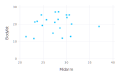

In [64]:
plot(data, x=:Midarm, y=:Bodyfat)

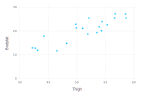

In [22]:
plot(data, x=:Thigh, y=:Bodyfat)

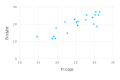

In [65]:
plot(data, x=:Triceps, y=:Bodyfat)

## b) Estimation des paramètres de la régression linéaire simple avec $x₁$

Estimez lez paramètres du modèle de régression linéaire pour chacun des trois variables explicatives.

In [67]:
y = data[:Bodyfat]
ȳ = mean(y)
x₁ = data[:, :Midarm]
x̄₁ = mean(x₁)
n = length(y)

β̂₁₁ = sum( (x₁[i] - x̄₁)*(y[i] - ȳ) for i=1:n) / sum( (x₁[i] - x̄₁)^2 for i=1:n )
β̂₀₁ = ȳ - β̂₁₁*x̄

println("L'ordonne a l'origine = ", β̂₀₁)
println("La pente de la droite de regression estimee = ", β̂₁₁)

L'ordonne a l'origine = 14.686780858775304
La pente de la droite de regression estimee = 0.1994286437807638


In [71]:
x₂ = data[:, :Thigh]
x̄₂ = mean(x₂)

β̂₁₂ = sum( (x₂[i] - x̄₂)*(y[i] - ȳ) for i=1:n) / sum( (x₂[i] - x̄₂)^2 for i=1:n )
β̂₀₂ = ȳ - β̂₁₂*x̄₂

println("La pente = ", β̂₁₂)
println("L'ordonne = ", β̂₀₂)

La pente = 0.85654659234531
L'ordonne = -23.634489130309518


In [70]:
x₃ = data[:, :Triceps]
x̄₃ = mean(x₃)


β̂₁₃ = sum( (x₃[i] - x̄₃)*(y[i] - ȳ) for i=1:n) / sum( (x₃[i] - x̄₃)^2 for i=1:n )
β̂₀₃ = ȳ - β̂₁₃*x̄₃

println(β̂₁₃)
println(β̂₀₃)



0.8571865102168306
-1.4961046410368972


In [ ]:
# Vous devriez obtenir β̂₀ = -1.50 et β̂₁ = 0.857.

## c) Affichage de la droite de régression obtenue

Superposez au nuage de points précédent la droite de régression estimée. Vous pouvez utiliser la géométrie `Geom.abline()` de *Gadfly*. 

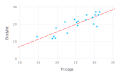

In [72]:
#Pour thigh
Gadfly.set_default_plot_size(12cm, 8cm)

plot(data, x=:Triceps, y=:Bodyfat, Geom.point,
    intercept = [β̂₀₃], slope = [β̂₁₃], Geom.abline(color="red", style=:dash))

## d) Calcul du coefficient de détermination

Calculez le coefficient de détermination de la régression.

In [85]:
ŷ = x₃*β̂₁₃ .+ β̂₀₃
e = y - ŷ

SST = sum((y[i] - ŷ[i])^2 for i=1:n)
SSR = sum((ŷ[i] - ŷ[i])^2 for i=1:n)

0.0

In [ ]:
# Vous devriez obtenir R² = 0.7110966155559691

## e) Interprétation du modèle de régression

Donnez une interprétation de 
- de l'estimation de l'ordonnée à l'origine $β̂₀$ ;
- de l'estimation de la pente $β̂₁$ ;
- du coefficient de détermination $R²$ .

## f)  Identification du meilleur modèle unidimensionnel

Identifiez lequel parmi les trois modèles de régression linéaire simple est le meilleur pour prédire le pourcentage de matière grasse d'un patient ? Justifier quantitativement votre réponse. 

Indice : calculez le coefficient de détermination de chacun des modèles.

# Exercice 2 - Régression linéaire multiple

Dans cet exercice, les trois variables explicatives seront utilisées pour prédire le pourcentage de matière grasse d'un patient.

## a) Estimation des paramètres de la régression linéaire multiple

En utilisant les trois variables explicatives, estimez les paramètres de la régression linéaire multiple avec la méthode des moindres carrés.

In [93]:
x_1 = data.Triceps
x_2 = data.Thigh
x_3 = data.Midarm

y = data.Bodyfat
n = length(y)
X = hcat(ones(n), x_1, x_2, x_3)

beta = inv(X'X)*X'*y

4-element Array{Float64,1}:
 117.08469478016318
   4.334092008375593
  -2.856847936297793
  -2.1860602516929113

In [ ]:
# Vous devriez obtenir β̂ = [117.0846947802495, 4.334092008375274, -2.856847936298782, -2.186060251693594]

## b) Calcul du coefficient de détermination 


Calculez le coefficient de détermination et comparez-le à ceux de la question 1 (f). Pouvez-vous conclure que ce modèle est meilleur ?

In [96]:
e = y - X*beta
SSE = e'e
R = 1 - SSE/SST

0.31242948392626924

In [ ]:
# Vous devriez obtenir R² = 0.8013585508623703

## c) Calcul des coefficients de régression à l'aide de la décomposition QR

Pour rendre les calculs numériques stables et efficaces, les coefficients de régressions sont généralement calculés à l'aide de la décomposition QR de la matrice de structure X, *i.e.*
$$ X = QR.$$

On peut montrer (Exercice 1 de la fin du chapitre 1 des notes de cours) que 

$$ β̂ = R^{-1} Q^\top y.$$

L'opération de la décomposition QR et de la résolution du système linéaire s'effectue en une commande à l'aide de l'opérateur `\`.

Estimez les coefficients de régression avec la commande `β̂ = X \ y`. Obtenez-vous les mêmes résultats ?
